<a href="https://colab.research.google.com/github/jnsbrdbr/thesis/blob/thesis/part6_gan_smote_tnse_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import jaccard_score
from scipy.spatial.distance import pdist, squareform
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip3 install pickle5
import pickle5 as pickle

In [9]:
with open('/content/drive/MyDrive/10000/ji/TTdata.pkl', "rb") as fh:
  adj = pickle.load(fh)

In [10]:
with open('/content/drive/MyDrive/10000/ji/TCFdf.pkl', "rb") as fh:
  CF = pickle.load(fh)

In [ ]:
with open('/content/drive/MyDrive/10000/ji/TTFdf.pkl', "rb") as fh:
  TF = pickle.load(fh)

In [ ]:
with open('/content/drive/MyDrive/10000/ji/TjaccardsimilaritydfR.pkl', "rb") as fh:
  jaccardsimilarity = pickle.load(fh)

In [ ]:
with open('/content/drive/MyDrive/10000/ji/TcosinesimilaritydfR.pkl', "rb") as fh:
  cosine = pickle.load(fh)

In [ ]:
with open('/content/drive/MyDrive/10000/ji/TL1normdf.pkl', "rb") as fh:
  L1_normdf = pickle.load(fh)

In [ ]:
with open('/content/drive/MyDrive/10000/ji/Tsum.pkl', "rb") as fh:
  wsumdf = pickle.load(fh)

In [ ]:
with open('/content/drive/MyDrive/10000/ji/Tmul.pkl', "rb") as fh:
  wmuldf = pickle.load(fh)

In [ ]:
with open('/content/drive/MyDrive/10000/ji/Tadjadamicadardf.pkl', "rb") as fh:
  adjadamicadardf = pickle.load(fh)

In [ ]:
with open('/content/drive/MyDrive/10000/ji/correlationdf.pkl', "rb") as fh:
  correlationdf = pickle.load(fh)

In [ ]:
with open('/content/drive/MyDrive/10000/ji/euclideansimilaritydf.pkl', "rb") as fh:
  euclideansimilaritydf = pickle.load(fh)

In [8]:
with open('/content/drive/MyDrive/10000/ji/TLdata.pkl', "rb") as fh:
  adjl = pickle.load(fh)

In [11]:
#CF


#oversample1=SMOTETomek(0.330)
oversample1 = SMOTE(sampling_strategy=0.3335)
CF_smote,CF_label= oversample1.fit_resample(CF,adjl['label'])
CF_smote.to_pickle('/content/drive/MyDrive/10000/smote pca/CF_smote.pkl')

In [ ]:
count=0
for i in range (0,len(CF_label)):
  if CF_label[i]==0:
    count+=1
print(count)

3304


In [ ]:
#TF
oversample2 = SMOTE(sampling_strategy=0.3335)
TF_smote,TF_label= oversample2.fit_resample(TF,adjl['label'])
TF_smote.to_pickle('/content/drive/MyDrive/10000/smote pca/TF_smote.pkl')

In [ ]:
#jaccardsimilarity
oversample3 = SMOTE(sampling_strategy=0.3335)
jaccard_similarity_smote,jaccard_similarity_label= oversample3.fit_resample(jaccardsimilarity,
                                                                            adjl['label'])
jaccard_similarity_smote.to_pickle('/content/drive/MyDrive/10000/smote pca/jaccard_similarity_smote.pkl')

In [ ]:
#cosine_similarity
oversample4 = SMOTE(sampling_strategy=0.3335)
cosine_similarity_smote,cosine_similarity_label= oversample4.fit_resample(cosine,
                                                                          adjl['label'])
cosine_similarity_smote.to_pickle('/content/drive/MyDrive/10000/smote pca/cosine_similarity_smote.pkl')

In [ ]:
#L1_norm
oversample5 = SMOTE(sampling_strategy=0.3335)
L1_norm_smote,L1_norm_label= oversample5.fit_resample(L1_normdf,adjl['label'])
L1_norm_smote.to_pickle('/content/drive/MyDrive/10000/smote pca/L1_norm_smote.pkl')

In [ ]:
#wsum
oversample6 = SMOTE(sampling_strategy=0.3335)
wsum_smote,wsum_label= oversample6.fit_resample(wsumdf,adjl['label'])
wsum_smote.to_pickle('/content/drive/MyDrive/10000/smote pca/wsum_smote.pkl')

In [ ]:
#wmul
oversample7 = SMOTE(sampling_strategy=0.3335)
wmul_smote,wmul_label= oversample7.fit_resample(wmuldf,adjl['label'])
wmul_smote.to_pickle('/content/drive/MyDrive/10000/smote pca/wmul_smote.pkl')

In [ ]:
#adamicadar
oversample8 = SMOTE(sampling_strategy=0.3335)
adjadamicadar_smote,adjadamicadar_label= oversample8.fit_resample(adjadamicadardf,adjl['label'])
adjadamicadar_smote.to_pickle('/content/drive/MyDrive/10000/smote pca/adjadamicadar_smote.pkl')

In [ ]:
#correlation
oversample9 = SMOTE(sampling_strategy=0.3335)
correlation_smote,correlation_label= oversample9.fit_resample(correlationdf,adjl['label'])
correlation_smote.to_pickle('/content/drive/MyDrive/10000/smote pca/correlation_smote.pkl')

In [ ]:
#euclideansimilarity
oversample10 = SMOTE(sampling_strategy=0.3335)
euclideansimilarity_smote,euclideansimilarity_label= oversample10.fit_resample(euclideansimilaritydf,adjl['label'])
euclideansimilarity_smote.to_pickle('/content/drive/MyDrive/10000/smote pca/euclideansimilarity_smote.pkl')

# **Pca / T_sne**

In [ ]:
with open('/content/drive/MyDrive/10000/smote pca/CF_smote.pkl', "rb") as fh:
  CF_smote = pickle.load(fh)

In [ ]:
#CF_pca
pca = PCA(n_components=10)
CF_pca = pca.fit_transform(CF_smote)
CF_pca_df=pd.DataFrame(CF_pca)
CF_pca_df1=pd.DataFrame(CF_pca)
CF_pca_df.to_pickle('/content/drive/MyDrive/10000/smote pca/CF_pca_df.pkl')

In [ ]:
CF_TSNE = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(CF_pca)
CF_TSNE_df=pd.DataFrame(CF_TSNE)

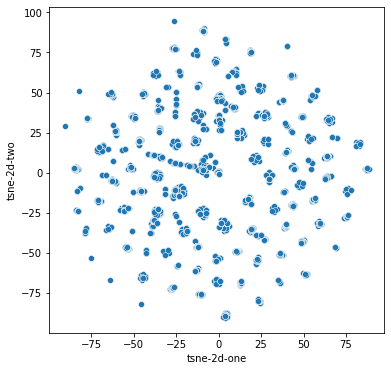

In [ ]:

CF_pca_df1['tsne-2d-one'] = CF_TSNE[:,0]
CF_pca_df1['tsne-2d-two'] = CF_TSNE[:,1]
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    palette=sns.color_palette("hls", 10),
    data=CF_pca_df1,
    #legend="full",
    #alpha=0.3
)

In [ ]:
with open('/content/drive/MyDrive/10000/smote pca/TF_smote.pkl', "rb") as fh:
  TF_smote = pickle.load(fh)

In [ ]:
pca = PCA(n_components=10)
TF_pca = pca.fit_transform(TF_smote)
TF_pca_df=pd.DataFrame(TF_pca)
TF_pca_df1=pd.DataFrame(TF_pca)
TF_pca_df.to_pickle('/content/drive/MyDrive/10000/smote pca/TF_pca_df.pkl')

In [ ]:
TF_TSNE = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(TF_pca)
TF_TSNE_df=pd.DataFrame(TF_TSNE)

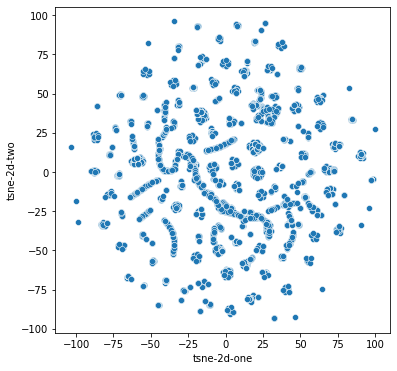

In [ ]:

TF_pca_df1['tsne-2d-one'] = TF_TSNE[:,0]
TF_pca_df1['tsne-2d-two'] = TF_TSNE[:,1]
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    #palette=sns.color_palette("hls", 10),
    data=TF_pca_df1,
    #legend="full",
    #alpha=0.3
)

In [ ]:
with open('/content/drive/MyDrive/10000/smote pca/jaccard_similarity_smote.pkl', "rb") as fh:
  jaccard_similarity_smote = pickle.load(fh)

In [ ]:
pca = PCA(n_components=10)
jaccard_similarity_pca = pca.fit_transform(jaccard_similarity_smote)
jaccard_similarity_pca_df=pd.DataFrame(jaccard_similarity_pca)
jaccard_similarity_pca_df1=pd.DataFrame(jaccard_similarity_pca)
jaccard_similarity_pca_df.to_pickle('/content/drive/MyDrive/10000/smote pca/jaccard_similarity_pca_df.pkl')

In [ ]:
jaccard_similarity_TSNE = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(
    jaccard_similarity_pca)
jaccard_similarity_TSNE_df=pd.DataFrame(jaccard_similarity_TSNE)

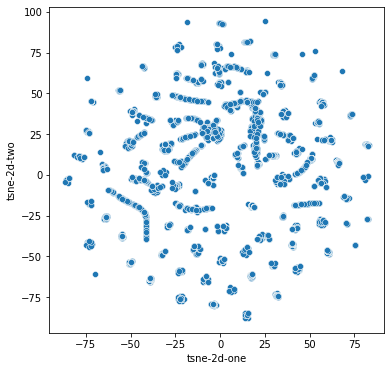

In [ ]:
jaccard_similarity_pca_df1['tsne-2d-one'] = jaccard_similarity_TSNE[:,0]
jaccard_similarity_pca_df1['tsne-2d-two'] = jaccard_similarity_TSNE[:,1]
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    #palette=sns.color_palette("hls", 10),
    data=jaccard_similarity_pca_df1,
    #legend="full",
    #alpha=0.3
)

In [ ]:
with open('/content/drive/MyDrive/10000/smote pca/cosine_similarity_smote.pkl', "rb") as fh:
  cosine_similarity_smote = pickle.load(fh)

In [ ]:
pca = PCA(n_components=10)
cosine_similarity_pca = pca.fit_transform(cosine_similarity_smote)
cosine_similarity_pca_df=pd.DataFrame(cosine_similarity_pca)
cosine_similarity_pca_df1=pd.DataFrame(cosine_similarity_pca)
cosine_similarity_pca_df.to_pickle('/content/drive/MyDrive/10000/smote pca/cosine_similarity_pca_df.pkl')

In [ ]:
cosine_similarity_TSNE = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(
    cosine_similarity_pca)
cosine_similarity_TSNE_df=pd.DataFrame(cosine_similarity_TSNE)

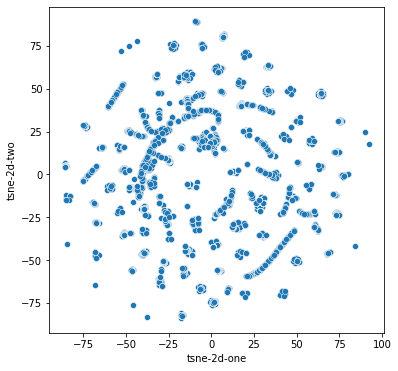

In [ ]:
cosine_similarity_pca_df1['tsne-2d-one'] = cosine_similarity_TSNE[:,0]
cosine_similarity_pca_df1['tsne-2d-two'] = cosine_similarity_TSNE[:,1]
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    #palette=sns.color_palette("hls", 10),
    data=cosine_similarity_pca_df1,
    #legend="full",
    #alpha=0.3
)

In [ ]:
with open('/content/drive/MyDrive/10000/smote pca/L1_norm_smote.pkl', "rb") as fh:
  L1_norm_smote = pickle.load(fh)

In [ ]:
pca = PCA(n_components=10)
L1_normdf_similarity_pca = pca.fit_transform(L1_norm_smote)
L1_normdf_similarity_pca_df=pd.DataFrame(L1_normdf_similarity_pca)
L1_normdf_similarity_pca_df1=pd.DataFrame(L1_normdf_similarity_pca)
L1_normdf_similarity_pca_df.to_pickle('/content/drive/MyDrive/10000/smote pca/L1_normdf_similarity_pca_df.pkl')

In [ ]:
L1_normdf_similarity_TSNE = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(L1_normdf_similarity_pca)
L1_normdf_similarity_TSNE_df=pd.DataFrame(L1_normdf_similarity_TSNE)

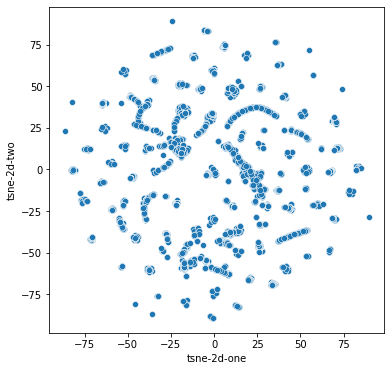

In [ ]:
L1_normdf_similarity_pca_df1['tsne-2d-one'] = L1_normdf_similarity_TSNE[:,0]
L1_normdf_similarity_pca_df1['tsne-2d-two'] = L1_normdf_similarity_TSNE[:,1]
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    #palette=sns.color_palette("hls", 10),
    data=L1_normdf_similarity_pca_df1,
    #legend="full",
    #alpha=0.3
)

In [ ]:
with open('/content/drive/MyDrive/10000/smote pca/wsum_smote.pkl', "rb") as fh:
  wsum_smote = pickle.load(fh)

In [ ]:
pca = PCA(n_components=10)
wsumdf_similarity_pca = pca.fit_transform(wsum_smote)
wsumdf_similarity_pca_df=pd.DataFrame(wsumdf_similarity_pca)
wsumdf_similarity_pca_df1=pd.DataFrame(wsumdf_similarity_pca)
wsumdf_similarity_pca_df.to_pickle('/content/drive/MyDrive/10000/smote pca/wsumdf_similarity_pca_df.pkl')

In [ ]:
wsumdf_similarity_TSNE = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(wsumdf_similarity_pca)
wsumdf_similarity_TSNE_df=pd.DataFrame(wsumdf_similarity_TSNE)

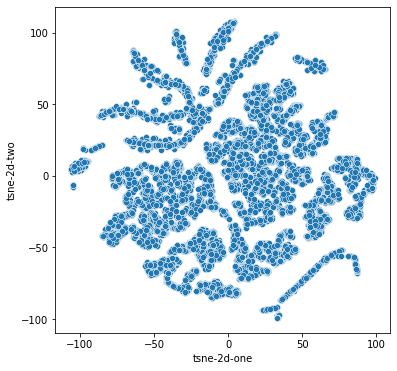

In [ ]:
wsumdf_similarity_pca_df1['tsne-2d-one'] = wsumdf_similarity_TSNE[:,0]
wsumdf_similarity_pca_df1['tsne-2d-two'] = wsumdf_similarity_TSNE[:,1]
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    #palette=sns.color_palette("hls", 10),
    data=wsumdf_similarity_pca_df1,
    #legend="full",
    #alpha=0.3
)

In [ ]:
with open('/content/drive/MyDrive/10000/smote pca/wmul_smote.pkl', "rb") as fh:
  wmul_smote = pickle.load(fh)

In [ ]:
pca = PCA(n_components=10)
wmuldf_similarity_pca = pca.fit_transform(wmul_smote)
wmuldf_similarity_pca_df=pd.DataFrame(wmuldf_similarity_pca)
wmuldf_similarity_pca_df1=pd.DataFrame(wmuldf_similarity_pca)
wmuldf_similarity_pca_df.to_pickle('/content/drive/MyDrive/10000/smote pca/wmuldf_similarity_pca_df.pkl')

In [ ]:
wmuldf_similarity_TSNE = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(wmuldf_similarity_pca)
wmuldf_similarity_TSNE_df=pd.DataFrame(wmuldf_similarity_TSNE)

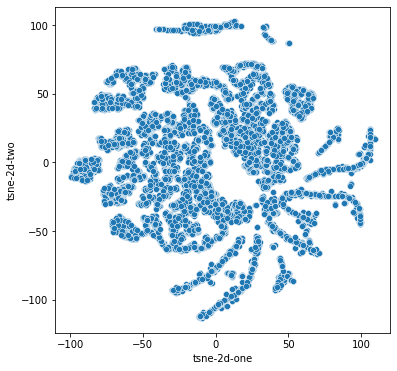

In [ ]:
wmuldf_similarity_pca_df1['tsne-2d-one'] = wmuldf_similarity_TSNE[:,0]
wmuldf_similarity_pca_df1['tsne-2d-two'] = wmuldf_similarity_TSNE[:,1]
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    #palette=sns.color_palette("hls", 10),
    data=wmuldf_similarity_pca_df1,
    #legend="full",
    #alpha=0.3
)

In [ ]:
with open('/content/drive/MyDrive/10000/smote pca/adjadamicadar_smote.pkl', "rb") as fh:
  adjadamicadar_smote = pickle.load(fh)

In [ ]:
pca = PCA(n_components=10)
adjadamicadar_pca = pca.fit_transform(adjadamicadar_smote)
adjadamicadar_pca_df=pd.DataFrame(adjadamicadar_pca)
adjadamicadar_pca_df1=pd.DataFrame(adjadamicadar_pca)
adjadamicadar_pca_df.to_pickle('/content/drive/MyDrive/10000/smote pca/adjadamicadar_pca_df.pkl')

In [ ]:
adjadamicadar_TSNE = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(adjadamicadar_pca)
adjadamicadar_TSNE_df=pd.DataFrame(adjadamicadar_TSNE)

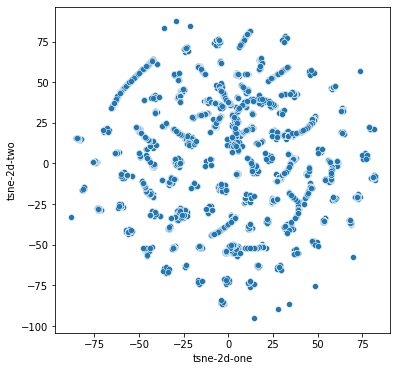

In [ ]:
adjadamicadar_pca_df1['tsne-2d-one'] = adjadamicadar_TSNE[:,0]
adjadamicadar_pca_df1['tsne-2d-two'] = adjadamicadar_TSNE[:,1]
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    #palette=sns.color_palette("hls", 10),
    data=adjadamicadar_pca_df1,
    #legend="full",
    #alpha=0.3
)

In [ ]:
with open('/content/drive/MyDrive/10000/smote pca/correlation_smote.pkl', "rb") as fh:
  correlation_smote = pickle.load(fh)

In [ ]:
pca = PCA(n_components=10)
correlation_smote_pca = pca.fit_transform(correlation_smote)
correlation_smote_pca_df=pd.DataFrame(correlation_smote_pca)
correlation_smote_pca_df1=pd.DataFrame(correlation_smote_pca)
correlation_smote_pca_df.to_pickle('/content/drive/MyDrive/10000/smote pca/correlation_smote_pca_df.pkl')

In [ ]:
correlation_smote_TSNE = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(correlation_smote_pca)
correlation_smote_TSNE_df=pd.DataFrame(correlation_smote_TSNE)

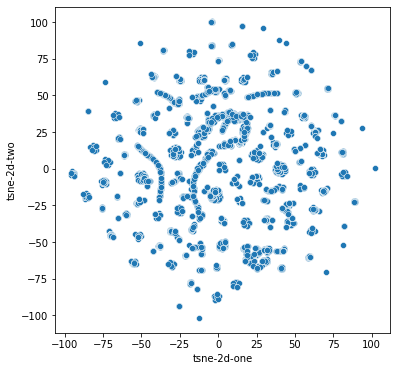

In [ ]:
correlation_smote_pca_df1['tsne-2d-one'] = correlation_smote_TSNE[:,0]
correlation_smote_pca_df1['tsne-2d-two'] = correlation_smote_TSNE[:,1]
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    #palette=sns.color_palette("hls", 10),
    data=correlation_smote_pca_df1,
    #legend="full",
    #alpha=0.3
)

In [4]:
with open('/content/drive/MyDrive/10000/smote pca/euclideansimilarity_smote.pkl', "rb") as fh:
  euclideansimilarity_smote = pickle.load(fh)

In [5]:
pca = PCA(n_components=10)
euclideansimilarity_smote_pca = pca.fit_transform(euclideansimilarity_smote)
euclideansimilarity_smote_pca_df=pd.DataFrame(euclideansimilarity_smote_pca)
euclideansimilarity_smote_pca_df1=pd.DataFrame(euclideansimilarity_smote_pca)
euclideansimilarity_smote_pca_df.to_pickle('/content/drive/MyDrive/10000/smote pca/euclideansimilarity_smote_pca_df.pkl')

In [6]:
euclideansimilarity_smote_TSNE = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(euclideansimilarity_smote_pca)
euclideansimilarity_smote_TSNE_df=pd.DataFrame(euclideansimilarity_smote_TSNE)

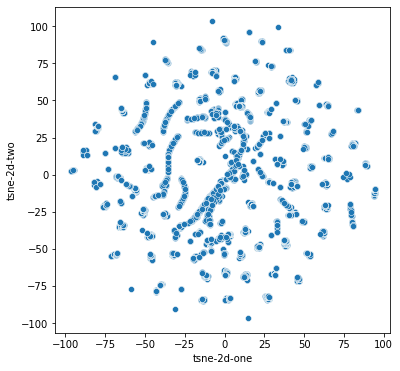

In [7]:
euclideansimilarity_smote_pca_df1['tsne-2d-one'] = euclideansimilarity_smote_TSNE[:,0]
euclideansimilarity_smote_pca_df1['tsne-2d-two'] = euclideansimilarity_smote_TSNE[:,1]
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    #palette=sns.color_palette("hls", 10),
    data=euclideansimilarity_smote_pca_df1,
    #legend="full",
    #alpha=0.3
)

In [12]:
with open('/content/drive/MyDrive/10000/smote pca/CF_pca_df.pkl', "rb") as fh:
  CF_pca_df = pickle.load(fh)

In [13]:
with open('/content/drive/MyDrive/10000/smote pca/TF_pca_df.pkl', "rb") as fh:
  TF_pca_df = pickle.load(fh)

In [14]:
with open('/content/drive/MyDrive/10000/smote pca/jaccard_similarity_pca_df.pkl', "rb") as fh:
  jaccard_similarity_pca_df = pickle.load(fh)

In [15]:
with open('/content/drive/MyDrive/10000/smote pca/cosine_similarity_pca_df.pkl', "rb") as fh:
  cosine_similarity_pca_df = pickle.load(fh)

In [16]:
with open('/content/drive/MyDrive/10000/smote pca/L1_normdf_similarity_pca_df.pkl', "rb") as fh:
  L1_normdf_similarity_pca_df = pickle.load(fh)

In [17]:
with open('/content/drive/MyDrive/10000/smote pca/wsumdf_similarity_pca_df.pkl', "rb") as fh:
  wsumdf_similarity_pca_df = pickle.load(fh)

In [18]:
with open('/content/drive/MyDrive/10000/smote pca/wmuldf_similarity_pca_df.pkl', "rb") as fh:
  wmuldf_similarity_pca_df = pickle.load(fh)

In [19]:
with open('/content/drive/MyDrive/10000/smote pca/adjadamicadar_pca_df.pkl', "rb") as fh:
  adjadamicadar_pca_df = pickle.load(fh)

In [20]:
with open('/content/drive/MyDrive/10000/smote pca/correlation_smote_pca_df.pkl', "rb") as fh:
  correlation_smote_pca_df = pickle.load(fh)

In [21]:
with open('/content/drive/MyDrive/10000/smote pca/euclideansimilarity_smote_pca_df.pkl', "rb") as fh:
  euclideansimilarity_smote_pca_df = pickle.load(fh)

In [25]:
#concat
frames = [CF_pca_df, TF_pca_df, jaccard_similarity_pca_df,cosine_similarity_pca_df,
          L1_normdf_similarity_pca_df,wsumdf_similarity_pca_df,wmuldf_similarity_pca_df,
          adjadamicadar_pca_df,
          correlation_smote_pca_df,euclideansimilarity_smote_pca_df,CF_label]
Tresult = pd.concat(frames,axis=1)

In [26]:
Tresult

,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,...,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,label
0,-2.231665,-3.223353,-0.847867,-0.985074,-0.787323,-0.987113,-0.438315,-0.287633,-0.438922,-0.223313,-385.277119,0.027790,1.272548,0.245895,0.054429,-0.065605,-1.512449,-0.034320,0.009671,0.144878,-2.430174,-3.024130,-0.646721,-1.074618,-0.727437,-1.036213,-0.469945,-0.157369,-0.504899,-0.250739,-2.387251,-3.123222,-0.315542,-1.141843,-0.726256,-1.049589,-0.485731,-0.151249,-0.528581,-0.192497,...,-0.009326,-0.002058,0.004250,-0.018316,-0.009664,-0.005046,-0.004350,-0.000657,-0.000599,-0.312710,-0.464790,-0.111664,-0.143809,-0.103293,-0.186912,-0.043280,-0.075503,-0.052663,-0.107036,-395.259593,-3.005622,0.051687,-0.301810,5.440069,1.291062,0.005345,0.001157,-0.010167,0.075861,1.236946,0.452139,-1.203407,-0.183899,-0.438911,-0.266164,-0.544673,-0.224884,-0.068575,-0.230930,1
1,-2.231665,-3.223353,-0.847867,-0.985074,-0.787323,-0.987113,-0.438315,-0.287633,-0.438922,-0.223313,-385.277119,0.027790,1.272548,0.245895,0.054429,-0.065605,-1.512449,-0.034320,0.009671,0.144878,-2.430174,-3.024130,-0.646721,-1.074618,-0.727437,-1.036213,-0.469945,-0.157369,-0.504899,-0.250739,-2.387251,-3.123222,-0.315542,-1.141843,-0.726256,-1.049589,-0.485731,-0.151249,-0.528581,-0.192497,...,-0.009326,-0.002058,0.004250,-0.018316,-0.009664,-0.005046,-0.004350,-0.000657,-0.000599,-0.312710,-0.464790,-0.111664,-0.143809,-0.103293,-0.186912,-0.043280,-0.075503,-0.052663,-0.107036,-395.259593,-3.005622,0.051687,-0.301810,5.440069,1.291062,0.005345,0.001157,-0.010167,0.075861,1.236946,0.452139,-1.203407,-0.183899,-0.438911,-0.266164,-0.544673,-0.224884,-0.068575,-0.230930,1
2,-2.231665,-3.223353,-0.847867,-0.985074,-0.787323,-0.987113,-0.438315,-0.287633,-0.438922,-0.223313,-385.277119,0.027790,1.272548,0.245895,0.054429,-0.065605,-1.512449,-0.034320,0.009671,0.144878,-2.430174,-3.024130,-0.646721,-1.074618,-0.727437,-1.036213,-0.469945,-0.157369,-0.504899,-0.250739,-2.387251,-3.123222,-0.315542,-1.141843,-0.726256,-1.049589,-0.485731,-0.151249,-0.528581,-0.192497,...,-0.009326,-0.002058,0.004250,-0.018316,-0.009664,-0.005046,-0.004350,-0.000657,-0.000599,-0.312710,-0.464790,-0.111664,-0.143809,-0.103293,-0.186912,-0.043280,-0.075503,-0.052663,-0.107036,-395.259593,-3.005622,0.051687,-0.301810,5.440069,1.291062,0.005345,0.001157,-0.010167,0.075861,1.236946,0.452139,-1.203407,-0.183899,-0.438911,-0.266164,-0.544673,-0.224884,-0.068575,-0.230930,1
3,-2.231665,-3.223353,-0.847867,-0.985074,-0.787323,-0.987113,-0.438315,-0.287633,-0.438922,-0.223313,-385.277119,0.027790,1.272548,0.245895,0.054429,-0.065605,-1.512449,-0.034320,0.009671,0.144878,-2.430174,-3.024130,-0.646721,-1.074618,-0.727437,-1.036213,-0.469945,-0.157369,-0.504899,-0.250739,-2.387251,-3.123222,-0.315542,-1.141843,-0.726256,-1.049589,-0.485731,-0.151249,-0.528581,-0.192497,...,-0.009326,-0.002058,0.004250,-0.018316,-0.009664,-0.005046,-0.004350,-0.000657,-0.000599,-0.312710,-0.464790,-0.111664,-0.143809,-0.103293,-0.186912,-0.043280,-0.075503,-0.052663,-0.107036,-395.259593,-3.005622,0.051687,-0.301810,5.440069,1.291062,0.005345,0.001157,-0.010167,0.075861,1.236946,0.452139,-1.203407,-0.183899,-0.438911,-0.266164,-0.544673,-0.224884,-0.068575,-0.230930,1
4,-2.231871,-3.223762,-0.848254,-0.985617,-0.787896,-0.987987,-0.439101,-0.288391,-0.439995,-0.224429,4113.718267,-0.027503,-7.620399,-0.853536,-3.378035,0.986249,-0.903425,1.035782,1.067622,8.194041,-2.430174,-3.024130,-0.646721,-1.074618,-0.727437,-1.036213,-0.469945,-0.157369,-0.504899,-0.250739,-2.387251,-3.123222,-0.315542,-1.141843,-0.726256,-1.049589,-0.485731,-0.151249,-0.528581,-0.192497,...,0.000008,-0.000021,-0.000215,-0.000272,-0.000037,-0.000296,0.000016,0.000025,0.000042,-0.316056,-0.471825,-0.118445,-0.155059,-0.115603,-0.219616,0.341737,-0.051602,-0.046099,-0.095389,4103.693418,-2.342286,0.143486,-4.846825,3.371250,-8.209215,-0.263780,-1.787069,-0.494391,4.75

In [28]:
Tresult.to_pickle('/content/drive/MyDrive/10000/Tresult.pkl')